In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv("chicago_crimes_2001_present.csv")
df["date"] = pd.to_datetime(df["date"])


In [3]:
print(df.columns)
print(df.head)

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')
<bound method NDFrame.head of      unique_key case_number                      date                 block  \
0       8330429    HT564067 2011-10-28 05:05:00+00:00  001XX N JEFFERSON ST   
1       4382503    HL677533 2005-10-16 11:57:14+00:00  001XX N JEFFERSON ST   
2      10382226    HZ118472 2016-01-17 01:17:00+00:00       0000X E LAKE ST   
3      10418666    HZ155446 2016-02-18 04:40:00+00:00  001XX N MICHIGAN AVE   
4       2375767    HH681975 2002-09-30 10:10:00+00:00    005XX W MADISON ST   
..          ...         ...                       ...                   ...   
995    11073290    JA413522 2017-08-31 03:00:00+00:00  0000X N MICHIGAN AVE   


In [4]:
print(df.describe())

         unique_key         beat  district        ward  community_area  \
count  1.000000e+03  1000.000000    1000.0  946.000000      946.000000   
mean   8.780968e+06   111.357000       1.0   34.487315       31.247357   
std    3.423316e+06     0.479355       0.0   15.433021        1.564189   
min    1.314247e+06   111.000000       1.0    2.000000       28.000000   
25%    6.417170e+06   111.000000       1.0   42.000000       32.000000   
50%    9.940976e+06   111.000000       1.0   42.000000       32.000000   
75%    1.142165e+07   112.000000       1.0   42.000000       32.000000   
max    1.329233e+07   112.000000       1.0   42.000000       32.000000   

       x_coordinate  y_coordinate         year    latitude   longitude  
count  9.910000e+02  9.910000e+02  1000.000000  991.000000  991.000000  
mean   1.175440e+06  1.900545e+06  2013.173000   41.882471  -87.631239  
std    1.560702e+03  9.189916e+02     6.369273    0.002504    0.005745  
min    1.171676e+06  1.898426e+06  2001.0

Text(0, 0.5, 'Total Crimes')

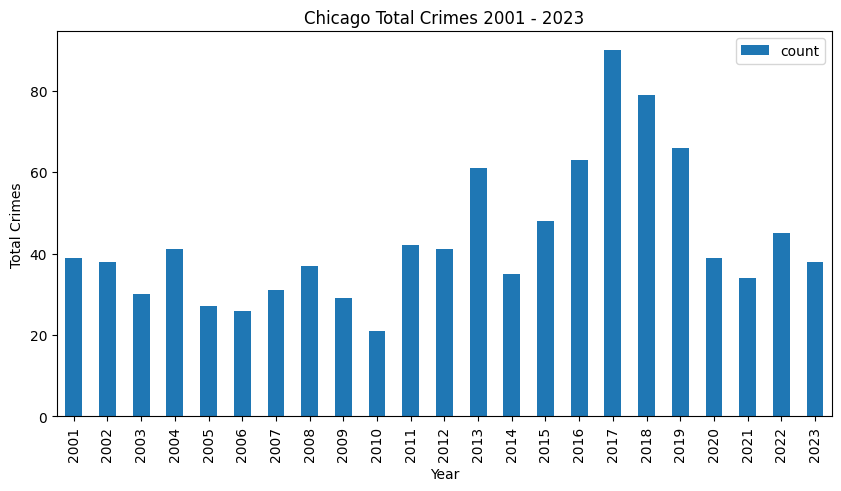

In [5]:
total_crimes_by_year = pd.DataFrame(df["year"].value_counts().reset_index())
total_crimes_by_year.columns = ["year", "count"]
total_crimes_by_year = total_crimes_by_year.sort_values(by="year")

# print(total_crimes_by_year)

total_crimes_by_year.plot.bar( x = "year", y = "count", figsize=(10,5))

plt.title("Chicago Total Crimes 2001 - 2023")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

In [6]:
type_of_crimes = pd.DataFrame(set(zip(df["primary_type"].unique(), df["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(type_of_crimes)

top_five_crimes = type_of_crimes.sort_values(by = "count", ascending = False).head(5)
print(top_five_crimes)

                  primary_type  count
0      CRIMINAL SEXUAL ASSAULT      1
1                      ROBBERY    625
2           DECEPTIVE PRACTICE     29
3                 PROSTITUTION      8
4              CRIMINAL DAMAGE     24
5            CRIMINAL TRESPASS     17
6   OFFENSE INVOLVING CHILDREN      3
7            WEAPONS VIOLATION     12
8       PUBLIC PEACE VIOLATION      1
9                OTHER OFFENSE      1
10         MOTOR VEHICLE THEFT     34
11                    BURGLARY     38
12                       THEFT     34
13                     ASSAULT     71
14        LIQUOR LAW VIOLATION      1
15                   NARCOTICS      1
16                 SEX OFFENSE      4
17                     BATTERY     95
18         CRIM SEXUAL ASSAULT      1
           primary_type  count
1               ROBBERY    625
17              BATTERY     95
13              ASSAULT     71
11             BURGLARY     38
10  MOTOR VEHICLE THEFT     34


Text(0.5, 1.0, 'Chicago Top Five Crimes 2001 - 2023')

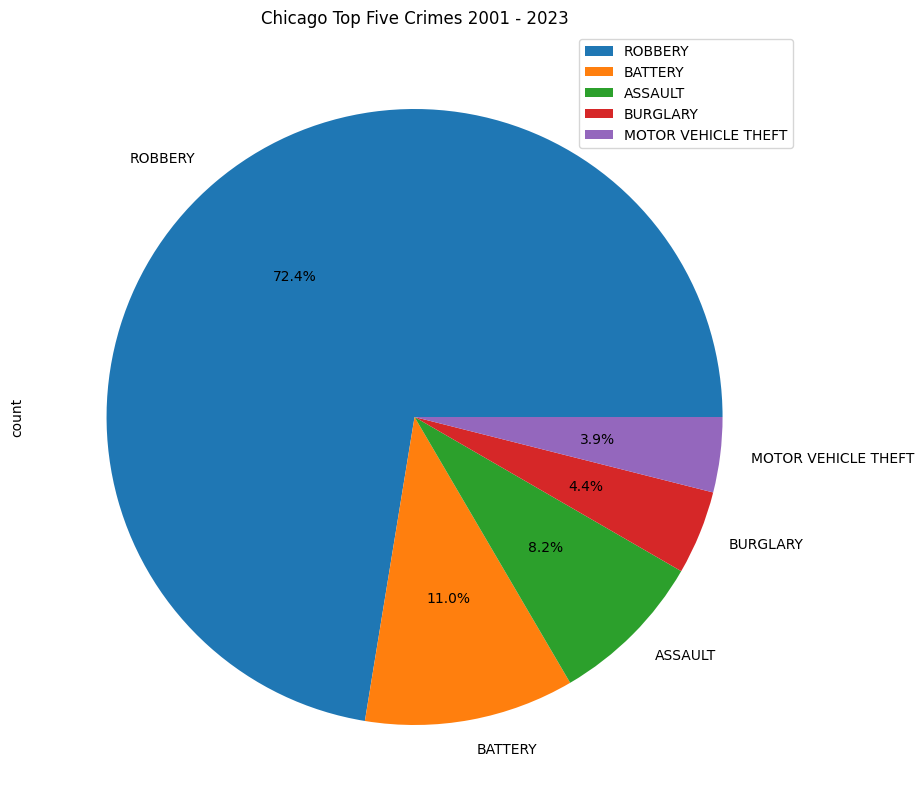

In [7]:
# top_five_crimes.plot.pie(y = "count", labels = top_five_crimes["primary_type"], figsize = (12,10))

top_five_crimes.plot.pie(y="count", labels=top_five_crimes['primary_type'], autopct='%1.1f%%', figsize=(12, 10))

plt.title("Chicago Top Five Crimes 2001 - 2023")


In [41]:
crimes_2021 = df[df["date"].dt.year == 2021]
crimes_2021_count =  pd.DataFrame(set(zip(crimes_2021["primary_type"].unique(), crimes_2021["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2021_count)

crimes_2022 = df[df["date"].dt.year == 2022]
crimes_2022_count =  pd.DataFrame(set(zip(crimes_2022["primary_type"].unique(), crimes_2022["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2022_count)

crimes_2023 = df[df["date"].dt.year == 2023]
crimes_2023_count =  pd.DataFrame(set(zip(crimes_2023["primary_type"].unique(), crimes_2023["primary_type"].value_counts())), columns = ["primary_type", "count"])
print(crimes_2023_count)

             primary_type  count
0         CRIMINAL DAMAGE      1
1                 ASSAULT      1
2                 BATTERY     19
3  PUBLIC PEACE VIOLATION      1
4      DECEPTIVE PRACTICE      3
5                 ROBBERY      1
6                   THEFT      8
         primary_type  count
0     CRIMINAL DAMAGE      1
1  DECEPTIVE PRACTICE      1
2             ASSAULT      7
3   CRIMINAL TRESPASS      1
4            BURGLARY      1
5       OTHER OFFENSE      1
6             ROBBERY     23
7             BATTERY      8
8               THEFT      2
          primary_type  count
0      CRIMINAL DAMAGE      1
1   DECEPTIVE PRACTICE      1
2  MOTOR VEHICLE THEFT      1
3            NARCOTICS      1
4              ROBBERY      1
5        OTHER OFFENSE      1
6             BURGLARY      3
7                THEFT      2
8              ASSAULT     27


In [55]:
crimes_year_2000_and_up = df[df["date"].dt.year >= 2021]
# display(crimes_year_2000_and_up)

total_crimes__year_2000_and_up = crimes_year_2000_and_up.groupby(df["date"].dt.year)["primary_type"].value_counts()
display(total_crimes__year_2000_and_up)

date  primary_type          
2021  THEFT                     19
      BATTERY                    8
      ASSAULT                    3
      ROBBERY                    1
      CRIMINAL DAMAGE            1
      DECEPTIVE PRACTICE         1
      PUBLIC PEACE VIOLATION     1
2022  THEFT                     23
      BATTERY                    8
      ASSAULT                    7
      ROBBERY                    2
      BURGLARY                   1
      OTHER OFFENSE              1
      CRIMINAL TRESPASS          1
      CRIMINAL DAMAGE            1
      DECEPTIVE PRACTICE         1
2023  THEFT                     27
      DECEPTIVE PRACTICE         3
      CRIMINAL DAMAGE            2
      BURGLARY                   1
      ROBBERY                    1
      OTHER OFFENSE              1
      NARCOTICS                  1
      MOTOR VEHICLE THEFT        1
      ASSAULT                    1
Name: count, dtype: int64